# Integrating Embeddings with Queries in an Information Retrieval System

## Objective

In this exercise, we will learn how to integrate embeddings with a query to enhance an Information Retrieval (IR) system. We will use both static and contextual embeddings to generate representations of queries and documents, compute their similarities, and rank the documents based on relevance to the query.

---

## Stages Covered

1. **Introduction to Pre-trained Transformer Models**
   - Load and use BERT for contextual embeddings.
   - Load and use Word2Vec for static embeddings.

2. **Generating Text Embeddings**
   - Generate embeddings for queries and documents using BERT.
   - Generate embeddings for queries and documents using Word2Vec.

3. **Computing Similarity Between Embeddings**
   - Compute cosine similarity between query and document embeddings.
   - Rank documents based on similarity scores.

4. **Integrating Embeddings with Queries**
   - Practical implementation of embedding-based retrieval for a given text corpus.

---

## Prerequisites

- TensorFlow
- Hugging Face's Transformers library
- Gensim library
- Scikit-learn library
- A text corpus in the `../data` folder

---

## Exercise

Follow the steps below to integrate embeddings with a query and enhance your IR system.



Step 0: Verify requirements:

* tensorflow
* transformers
* scikit-learn
* matplotlib
* seaborn

Step 1: Download dataset from Kaggle

URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

In [2]:
import pandas as pd
wine_df = pd.read_csv('C:/Users/Ronny Amores/Desktop/EPN/Octavo/RI/Deberes/Examen/ir24a/week 08/data/archive/winemag-data_first150k.csv')
print(wine_df.head())
corpus = wine_df['description']

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Step 2: Load a Pre-trained Transformer Model

Use the BERT model for generating contextual embeddings and Word2Vec for static embeddings.

In [8]:
import tensorflow as tf
import gensim.downloader as api
from transformers import BertTokenizer, TFBertModel

# Load pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

c:\Users\Ronny Amores\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[==================================================] 100.0% 1662.8/1662.8MB downloaded


c:\Users\Ronny Amores\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ronny Amores\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the PyTorch model were not used when initializing the TF 2.0 mod

Step 3: Generate Text Embeddings

Static Embeddings with Word2Vec

In [9]:
import numpy as np

def generate_word2vec_embeddings(texts):
    embeddings = []
    for text in texts:
        tokens = text.lower().split()
        word_vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return np.array(embeddings)

word2vec_embeddings = generate_word2vec_embeddings(corpus[:10])
print("Word2Vec Embeddings:", word2vec_embeddings)
print("Word2Vec Shape:", word2vec_embeddings.shape)

Word2Vec Embeddings: [[ 0.01978664  0.03414721 -0.00884628 ... -0.01573336  0.06626587
  -0.02784729]
 [ 0.0016861  -0.00124741 -0.00065494 ... -0.04453754  0.06408358
   0.03221512]
 [-0.01758194  0.06408924  0.02408564 ... -0.04092503  0.09110224
   0.01769352]
 ...
 [ 0.02863665  0.00169689 -0.00209213 ... -0.05629005  0.11204083
   0.03335422]
 [ 0.03364817  0.00603784 -0.03152262 ... -0.0193573   0.12829183
  -0.00842387]
 [ 0.01875126  0.03864291  0.00552817 ... -0.07643094  0.06591528
   0.01740489]]
Word2Vec Shape: (10, 300)


Contextual Embeddings with BERT

In [10]:
def generate_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :])  # Use [CLS] token representation
    return np.array(embeddings).transpose(0,2,1)

bert_embeddings = generate_bert_embeddings(corpus[:10])
print("BERT Embeddings:", bert_embeddings)
print("Word2Vec Shape:", bert_embeddings.shape)

BERT Embeddings: [[[ 0.11967488]
  [-0.48856723]
  [ 0.36453092]
  ...
  [-0.43680483]
  [ 0.11976092]
  [ 0.18947849]]

 [[-0.05186689]
  [-0.36506552]
  [ 0.64745957]
  ...
  [-0.31474552]
  [ 0.05560096]
  [ 0.5154332 ]]

 [[-0.73173165]
  [ 0.3508851 ]
  [-0.0191382 ]
  ...
  [-0.03388319]
  [ 0.2265659 ]
  [ 0.30798087]]

 ...

 [[-0.35893553]
  [-0.58629507]
  [ 0.41342112]
  ...
  [-0.16299486]
  [ 0.33213317]
  [ 0.49520713]]

 [[-0.06120732]
  [-0.3186188 ]
  [ 0.66368103]
  ...
  [-0.26011467]
  [ 0.2298254 ]
  [ 0.49291304]]

 [[-0.79110795]
  [-0.31794316]
  [ 0.24998923]
  ...
  [-0.4293151 ]
  [ 0.30838773]
  [-0.06678629]]]
Word2Vec Shape: (10, 768, 1)


Step 4: Compute Similarity Between Embeddings

Use the scikit-learn library.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between Word2Vec embeddings
word2vec_similarity = cosine_similarity(word2vec_embeddings)
print("Word2Vec Cosine Similarity:\n", word2vec_similarity)

# Cosine similarity between BERT embeddings
bert_similarity = cosine_similarity(bert_embeddings.reshape(10,768))
print("BERT Cosine Similarity:\n", bert_similarity)

Word2Vec Cosine Similarity:
 [[1.         0.82536286 0.80511194 0.84191334 0.8391607  0.83854604
  0.821692   0.8248522  0.8463899  0.81403273]
 [0.82536286 1.0000002  0.79154444 0.8704568  0.70443    0.89196235
  0.8556001  0.9090055  0.8210256  0.81991446]
 [0.80511194 0.79154444 0.99999994 0.78133106 0.7663706  0.8108841
  0.760028   0.78692913 0.7806279  0.8284942 ]
 [0.84191334 0.8704568  0.78133106 0.99999964 0.7388935  0.8769779
  0.8692663  0.86583877 0.82994795 0.81447774]
 [0.8391607  0.70443    0.7663706  0.7388935  0.9999999  0.7408404
  0.7264277  0.75438005 0.8410481  0.73225105]
 [0.83854604 0.89196235 0.8108841  0.8769779  0.7408404  1.
  0.8641036  0.90941286 0.84747815 0.82548964]
 [0.821692   0.8556001  0.760028   0.8692663  0.7264277  0.8641036
  1.0000001  0.87098897 0.8183166  0.78823984]
 [0.8248522  0.9090055  0.78692913 0.86583877 0.75438005 0.90941286
  0.87098897 1.         0.860639   0.838891  ]
 [0.8463899  0.8210256  0.7806279  0.82994795 0.8410481  0.8474

Step 5: Compare Contextual and Static Embeddings

Analyze and compare the similarity results from both BERT and Word2Vec embeddings.

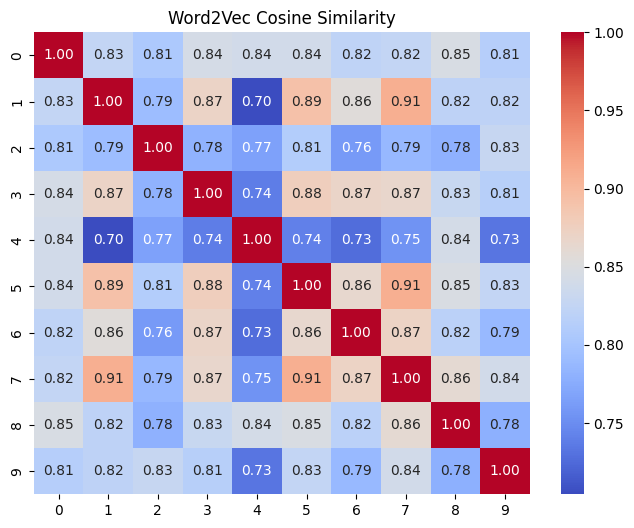

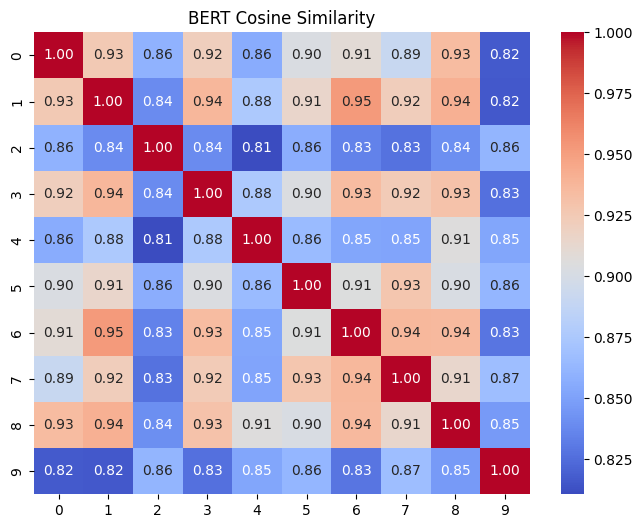

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(matrix, title, figsize=(8, 6), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_similarity_matrix(word2vec_similarity, "Word2Vec Cosine Similarity")
plot_similarity_matrix(bert_similarity, "BERT Cosine Similarity")

Step 6: Applying to Corpus

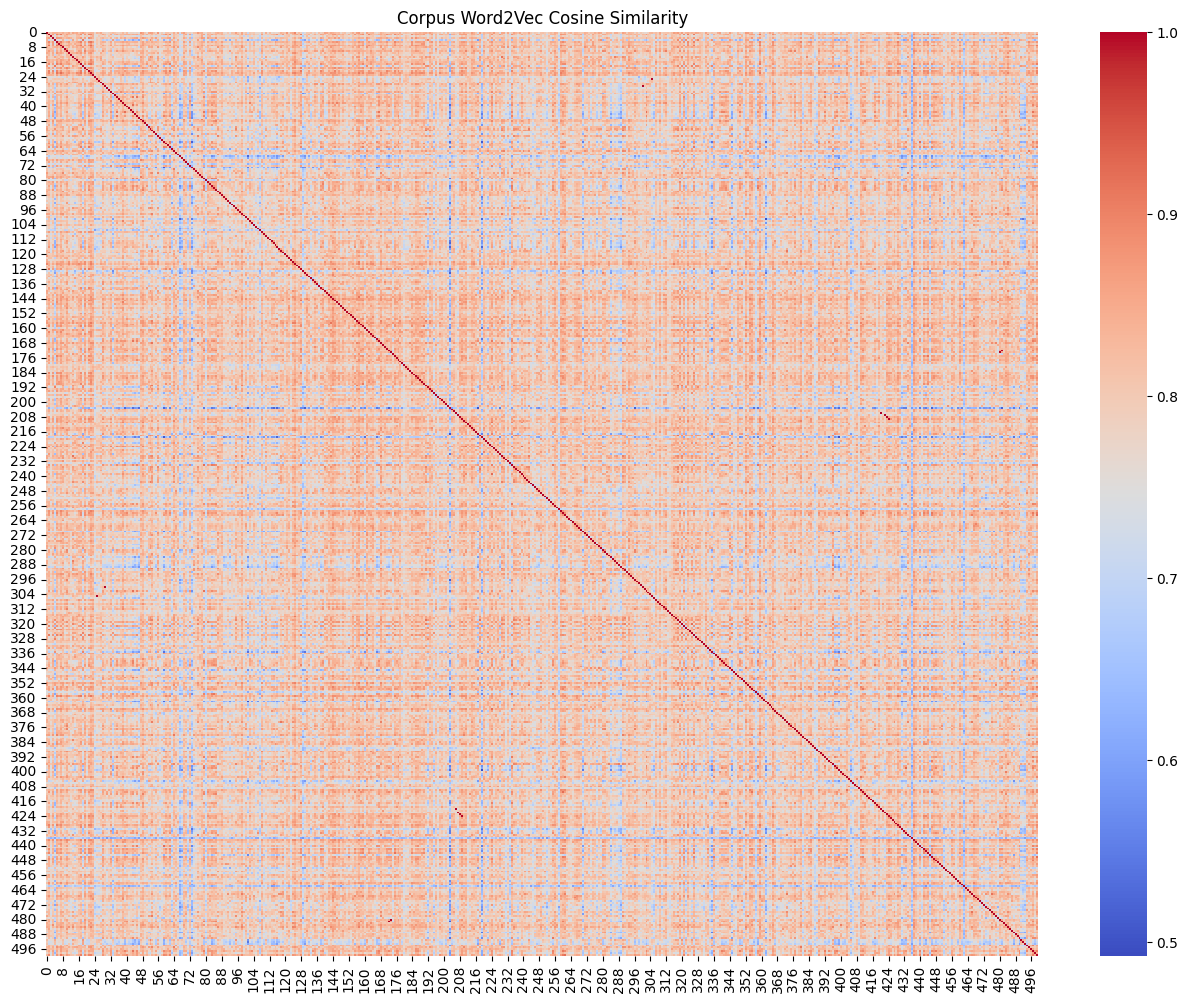

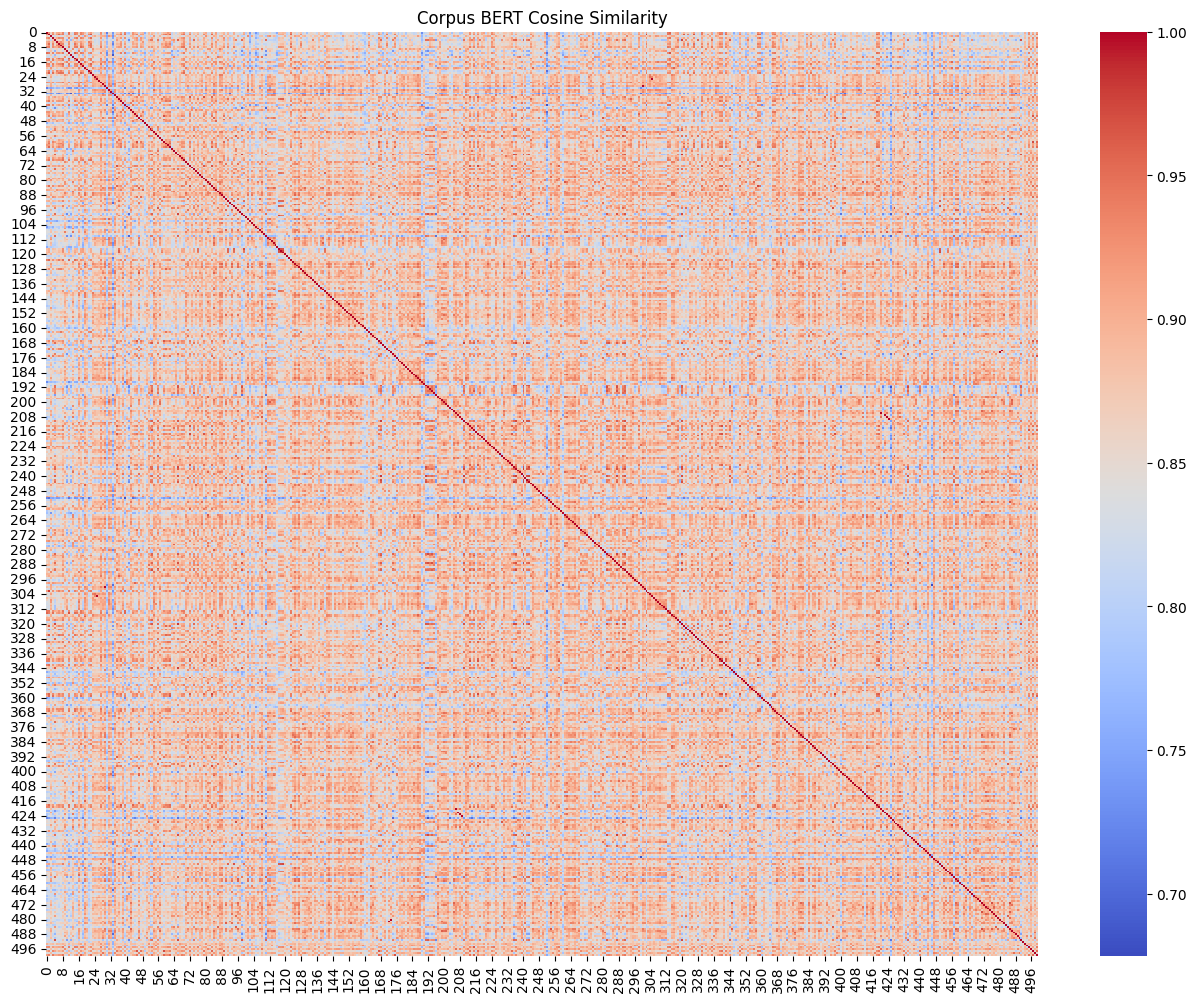

In [17]:
# Generate embeddings for the corpus
corpus_word2vec_embeddings = generate_word2vec_embeddings(corpus[:500])
corpus_bert_embeddings = generate_bert_embeddings(corpus[:500])

# Compute similarity for the corpus
corpus_word2vec_similarity = cosine_similarity(corpus_word2vec_embeddings)
corpus_bert_similarity = cosine_similarity(corpus_bert_embeddings.reshape(corpus_bert_embeddings.shape[:2]))

# Plot similarity matrices
plot_similarity_matrix(corpus_word2vec_similarity, "Corpus Word2Vec Cosine Similarity", figsize=(16, 12), annotation=False)
plot_similarity_matrix(corpus_bert_similarity, "Corpus BERT Cosine Similarity", figsize=(16, 12), annotation=False)

Summary

So far, in this exercise, you learned how to:

* Load a pre-trained transformer model (BERT) and a static embedding model (Word2Vec).
* Generate text embeddings using these models.
* Compute cosine similarity between embeddings.
* Compare the similarity results from both contextual and static embeddings.

Now you have a practical understanding of how transformers and embeddings can be used in Information Retrieval systems.

Let's integrate query search.

Step 7: Generate Embeddings for the Query

Generate embeddings for the query using the same model used for the documents.

In [33]:
# Ejemplo de consulta
query = "A complex wine with hints of berry and oak."

# Generar embeddings para la consulta usando Word2Vec
query_word2vec_embedding = generate_word2vec_embeddings([query])
print("Query Word2Vec Embedding Shape:", query_word2vec_embedding.shape)

# Generar embeddings para la consulta usando BERT
query_bert_embedding = generate_bert_embeddings([query])
print("Query BERT Embedding Shape:", query_bert_embedding.shape)


Query Word2Vec Embedding Shape: (1, 300)
Query BERT Embedding Shape: (1, 768, 1)


Step 8: Compute Similarity Between Query and Documents

Compute the similarity between the query embedding and each document embedding.

In [34]:
# Similitud del coseno entre la consulta y los documentos usando Word2Vec
query_word2vec_similarity = cosine_similarity(query_word2vec_embedding, corpus_word2vec_embeddings)
print("Query Word2Vec Similarity:\n", query_word2vec_similarity)

# Similitud del coseno entre la consulta y los documentos usando BERT
query_bert_similarity = cosine_similarity(query_bert_embedding.reshape(query_bert_embedding.shape[:2]), corpus_bert_embeddings.reshape(corpus_bert_embeddings.shape[:2]))
print("Query BERT Similarity:\n", query_bert_similarity)


Query Word2Vec Similarity:
 [[0.67230844 0.6785177  0.64122796 0.6768879  0.61704755 0.6439029
  0.6395532  0.70168793 0.6938634  0.6324455  0.75655276 0.66689885
  0.6931726  0.70576936 0.5508709  0.64538944 0.7311375  0.6633041
  0.59534633 0.70247185 0.6903565  0.6954011  0.7006897  0.6770368
  0.62183183 0.6087525  0.6156136  0.60305405 0.697536   0.65466565
  0.58121556 0.6499012  0.6677257  0.582173   0.64999235 0.69542694
  0.6862189  0.676758   0.6931083  0.67026675 0.6638946  0.5994649
  0.6096366  0.6475916  0.6435542  0.70301884 0.66678905 0.6812189
  0.67423654 0.6394516  0.6799556  0.60095525 0.6487361  0.7189707
  0.6312156  0.68575966 0.6393397  0.57501554 0.63317645 0.7177529
  0.70210016 0.6618065  0.69054854 0.58339965 0.65198743 0.6713053
  0.64774287 0.5120276  0.6029555  0.6580517  0.752796   0.64024425
  0.6778487  0.4817231  0.5906674  0.6290076  0.72517884 0.5795101
  0.6689888  0.67604524 0.6070804  0.68113565 0.6722573  0.72138906
  0.67864    0.64585054 0.692

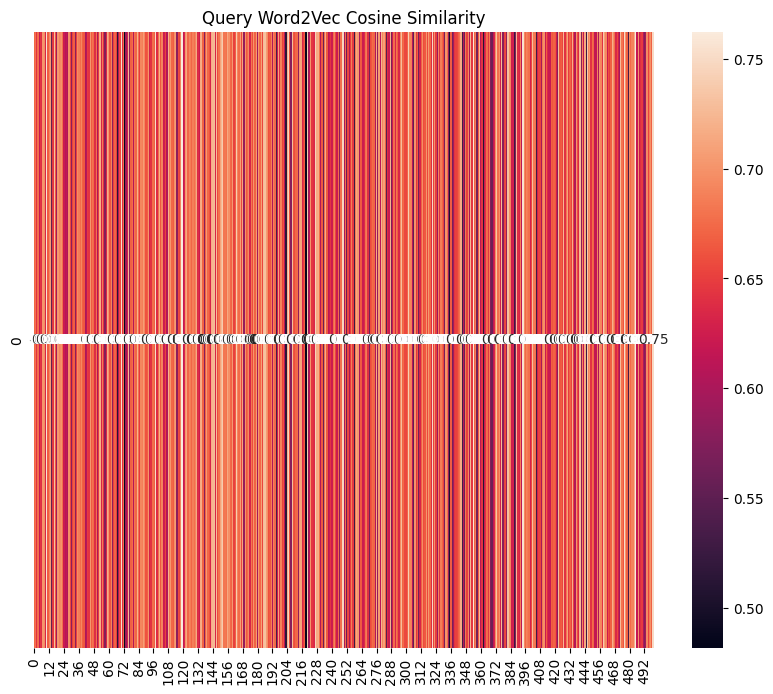

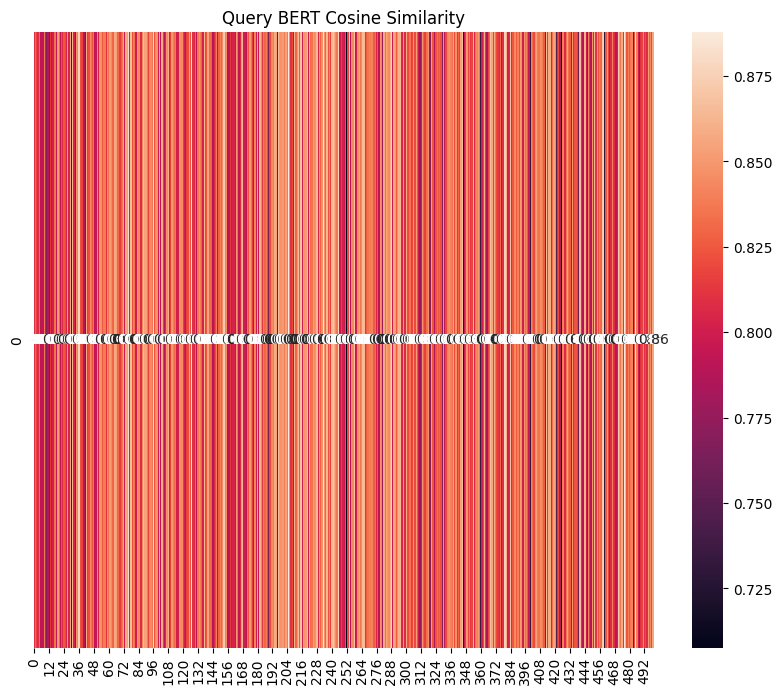

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para plotear la matriz de similitud
def plot_similarity_matrix(matrix, title, figsize=(16, 12), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation)
    plt.title(title)
    plt.show()

# Plotear la similitud entre la consulta y los documentos usando Word2Vec
plot_similarity_matrix(query_word2vec_similarity, "Query Word2Vec Cosine Similarity", figsize=(10, 8), annotation=True)

# Plotear la similitud entre la consulta y los documentos usando BERT
plot_similarity_matrix(query_bert_similarity, "Query BERT Cosine Similarity", figsize=(10, 8), annotation=True)


Step 9: Retrieve and Rank Documents Based on Similarity Scores

Retrieve and rank the documents based on their similarity scores to the query.

In [36]:
# Recuperar y clasificar documentos según las puntuaciones de similitud con Word2Vec
word2vec_sorted_indices = np.argsort(-query_word2vec_similarity[0])
print("Top documents using Word2Vec:")
for idx in word2vec_sorted_indices[:5]:
    print(f"Document {idx}: {corpus[idx]}")

# Recuperar y clasificar documentos según las puntuaciones de similitud con BERT
bert_sorted_indices = np.argsort(-query_bert_similarity[0])
print("Top documents using BERT:")
for idx in bert_sorted_indices[:5]:
    print(f"Document {idx}: {corpus[idx]}")

Top documents using Word2Vec:
Document 119: This broad, fruity wine brings out ripe berry flavors in spades. It has generous fruit, soft tannins and a smooth, open texture. Drink now.
Document 485: This is a sweet, honeyed wine, rich with apricot fruit flavors and fresh with balancing acidity. It's fruity, mineral and generous, a great wine for fruit desserts.
Document 354: Principally Pinot Noir, the blend includes 25% Pinot Meunier and a splash of Chardonnay. It's a light and pretty salmon pink in hue, with hints of honeysuckle and moist earth in the nose. Flavors suggest tart raspberries and Bing cherries, with impressive minerality in the crisp, lingering finish.
Document 10: Elegance, complexity and structure come together in this drop-dead gorgeous winethat ranks among Italy's greatest whites. It opens with sublime yellow spring flower, aromatic herb and orchard fruit scents. The creamy, delicious palate seamlessly combines juicy white peach, ripe pear and citrus flavors while wh

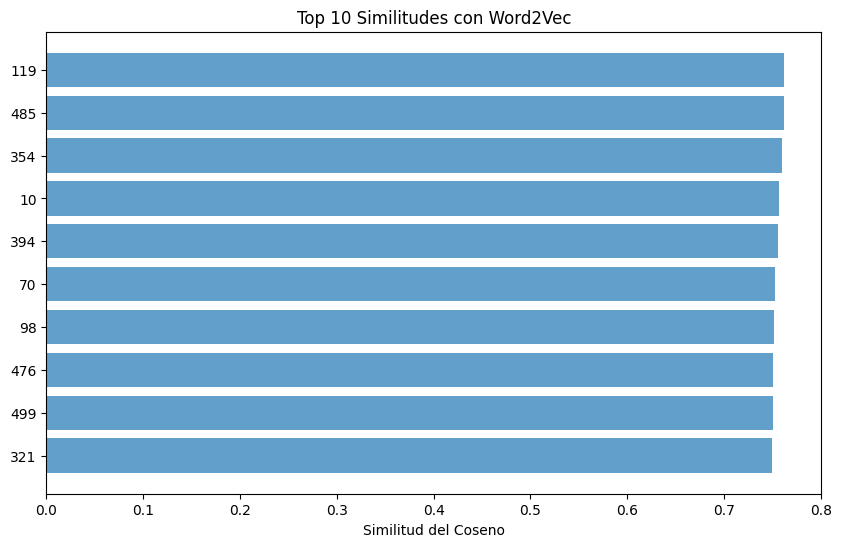

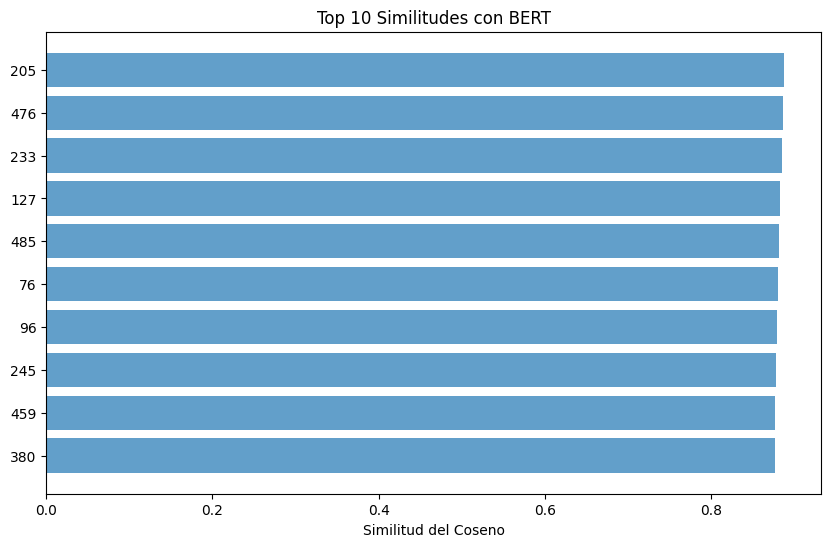

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Ordenar las similitudes y obtener los índices
sorted_word2vec_indices = np.argsort(query_word2vec_similarity[0])[::-1]
sorted_bert_indices = np.argsort(query_bert_similarity[0])[::-1]

# Seleccionar las top-N similitudes más altas para mostrar
top_n = 10
top_word2vec_indices = sorted_word2vec_indices[:top_n]
top_bert_indices = sorted_bert_indices[:top_n]

# Similitudes top-N
top_word2vec_similarities = query_word2vec_similarity[0][top_word2vec_indices]
top_bert_similarities = query_bert_similarity[0][top_bert_indices]

# Descripciones correspondientes (opcional, para etiquetar el gráfico)
top_word2vec_descriptions = [corpus[i] for i in top_word2vec_indices]
top_bert_descriptions = [corpus[i] for i in top_bert_indices]

# Crear un gráfico de barras para Word2Vec
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_word2vec_similarities, align='center', alpha=0.7)
plt.yticks(range(top_n), top_word2vec_indices)
plt.gca().invert_yaxis()  # invertir el eje y para que la barra más similar esté arriba
plt.xlabel('Similitud del Coseno')
plt.title('Top 10 Similitudes con Word2Vec')
plt.show()

# Crear un gráfico de barras para BERT
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_bert_similarities, align='center', alpha=0.7)
plt.yticks(range(top_n), top_bert_indices)
plt.gca().invert_yaxis()  # invertir el eje y para que la barra más similar esté arriba
plt.xlabel('Similitud del Coseno')
plt.title('Top 10 Similitudes con BERT')
plt.show()
print('0')
